In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense, Dropout, MaxPooling1D, Flatten
from sklearn.preprocessing import StandardScaler
from keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense

from tensorflow.keras.layers import Conv1D, ConvLSTM2D, MaxPooling1D, Dropout, Flatten, Dense, LSTM, MaxPooling3D
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Reshape


2024-04-15 22:19:08.489145: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-15 22:19:08.917400: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-15 22:19:08.917439: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-15 22:19:08.988043: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-15 22:19:10.802944: W tensorflow/stream_executor/platform/de

In [2]:
#data from kaggle dataset: "Prediction of music genre"
data1 = pd.read_csv("music_genre.csv")
#data from kaggle data set: "Spotify Tracks Dataset"
data2 = pd.read_csv("dataset.csv")

# Data 1 Cleaning

In [3]:
data1.shape

(50005, 18)

In [4]:
data1.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [5]:
#all the rows that are null
data1[data1['instance_id'].isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#because all the column values are none values, drop those rows
before_drop_na = len(data1)
data1 = data1.dropna()
after_drop_na = len(data1)
print("number of data dropped:", before_drop_na-after_drop_na)

number of data dropped: 5


In [7]:
data1.shape

(50000, 18)

# What to do with Tempo column in Data 1

In [8]:
#the tempo column in data 1 are strings with "?", therefore need to convert to integer
print(len(data1[data1["tempo"] == "?"]))
print(len(data1))

4980
50000


# Label encoding variables in data 1

In [9]:
#make key, mode into One Hot encoding
#music_genre into label encoding
onehot = OneHotEncoder(sparse=False)
onehot.fit(data1[['key', 'mode']])
onehotencoded = onehot.transform(data1[['key', 'mode']])
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(data1[['key', 'mode']].columns) for cat in onehot.categories_[i]]
onehotdf = pd.DataFrame(onehotencoded, columns=categorical_columns)
data1 = pd.concat([data1.reset_index(), onehotdf.reset_index()], axis=1)

labelencoder = LabelEncoder()
data1['key_num'] = labelencoder.fit_transform(data1['key'])
data1['mode_num'] = labelencoder.fit_transform(data1['mode'])
data1['music_genre_num'] = labelencoder.fit_transform(data1['music_genre'])
data1

,index,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,key_num,mode_num,music_genre_num
0,0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,5
1,1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,1,5
2,2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,11,0,5
3,3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,0,5
4,4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,0,6
49996,50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0,6
49997,50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,0,6
49998,50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10,1,6


In [10]:
data1_edit = data1.drop(columns = ["index", "instance_id", "artist_name", "track_name", "key", "mode", "tempo", "obtained_date", "music_genre", "key_num", "mode_num", "music_genre_num"])
features = data1_edit.columns

In [11]:
features

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major',
       'mode_Minor'],
      dtype='object')

In [12]:
data1_edit

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,0.759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,0.531,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,0.333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,0.270,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,0.323,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,59.0,0.03340,0.913,-1.0,0.574,0.00000,0.119,-7.022,0.2980,0.330,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49996,72.0,0.15700,0.709,251860.0,0.362,0.00000,0.109,-9.814,0.0550,0.113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49997,51.0,0.00597,0.693,189483.0,0.763,0.00000,0.143,-5.443,0.1460,0.395,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49998,65.0,0.08310,0.782,262773.0,0.472,0.00000,0.106,-5.016,0.0441,0.354,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# CNN-LSTM Baseline (Data 1)

In [ ]:
# Separate features and target variable
X = data1_edit  # Features
y = data1['music_genre_num']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

y_train_encoded = labelencoder.fit_transform(y_train)
y_test_encoded = labelencoder.transform(y_test)

# Standardize the features (optional but recommended for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for CNN-LSTM model (3D input)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN-LSTM model
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    LSTM(64),  # Add LSTM layer
    Flatten(),  # Flatten the output for Dense layers
    Dense(128, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print("Test Accuracy:", test_acc)

2024-04-15 22:19:17.482607: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-15 22:19:17.482666: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-15 22:19:17.482693: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-3da032f1-e5ab-4726-ac09-eb3d9c053730): /proc/driver/nvidia/version does not exist
2024-04-15 22:19:17.483157: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Epoch 1/5
 734/1250 [================>.............] - ETA: 8s - loss: 1.7392 - accu

## Attempt 1

In [ ]:
# Define the CNN-LSTM model with additional layers and regularization
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Dropout(0.2),  # Add dropout for regularization
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Dropout(0.2),  # Add dropout for regularization
    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    Dropout(0.2),  # Add dropout for regularization
    LSTM(64),  # Adding LSTM layer
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model with a lower learning rate
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with the enhanced architecture and regularization
history = model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print("Test Accuracy:", test_acc)


Epoch 1/5
1250/1250 [==============================] - 34s 23ms/step - loss: 1.7418 - accuracy: 0.3407 - val_loss: 1.4228 - val_accuracy: 0.4526
Epoch 2/5
1250/1250 [==============================] - 26s 21ms/step - loss: 1.4641 - accuracy: 0.4445 - val_loss: 1.2907 - val_accuracy: 0.5096
Epoch 3/5
1250/1250 [==============================] - 30s 24ms/step - loss: 1.3949 - accuracy: 0.4710 - val_loss: 1.2660 - val_accuracy: 0.5230
Epoch 4/5
1250/1250 [==============================] - 30s 24ms/step - loss: 1.3619 - accuracy: 0.4803 - val_loss: 1.2439 - val_accuracy: 0.5287
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 1.2280 - accuracy: 0.5348
Test Accuracy: 0.5347999930381775


In [ ]:
history = model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print("Test Accuracy:", test_acc)
y_pred = np.argmax(model.predict(X_test), axis=-1)

Epoch 1/5
1250/1250 [==============================] - 29s 24ms/step - loss: 1.3201 - accuracy: 0.4947 - val_loss: 1.2228 - val_accuracy: 0.5350
Epoch 2/5
1250/1250 [==============================] - 28s 22ms/step - loss: 1.3028 - accuracy: 0.5010 - val_loss: 1.2091 - val_accuracy: 0.5342
Epoch 3/5
1250/1250 [==============================] - 27s 21ms/step - loss: 1.2963 - accuracy: 0.5047 - val_loss: 1.1895 - val_accuracy: 0.5395
Epoch 4/5
1250/1250 [==============================] - 23s 18ms/step - loss: 1.2818 - accuracy: 0.5093 - val_loss: 1.2024 - val_accuracy: 0.5321
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 1.1755 - accuracy: 0.5440
Test Accuracy: 0.5440000295639038
313/313 [==============================] - 4s 7ms/step


<Figure size 10000x8000 with 0 Axes>

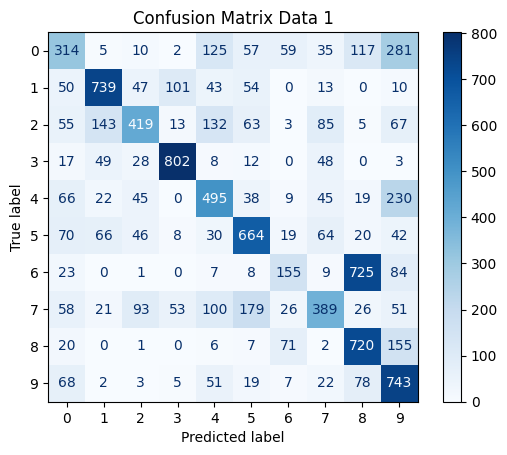

In [ ]:
cm1 = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(100, 80))
ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=np.unique(y_test_encoded)).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix Data 1')
plt.show()
#print("Confusion Matrix:")
#print(conf_matrix)

In [ ]:
unique_labels = np.unique(y_test)
class_names = [str(label) for label in unique_labels]



In [ ]:
print("Classification Report for Data 1:")
print(classification_report(y_test_encoded, y_pred, target_names = class_names))

Classification Report for Data 1:
              precision    recall  f1-score   support

           0       0.42      0.31      0.36      1005
           1       0.71      0.70      0.70      1057
           2       0.60      0.43      0.50       985
           3       0.82      0.83      0.82       967
           4       0.50      0.51      0.50       969
           5       0.60      0.65      0.62      1029
           6       0.44      0.15      0.23      1012
           7       0.55      0.39      0.46       996
           8       0.42      0.73      0.53       982
           9       0.45      0.74      0.56       998

    accuracy                           0.54     10000
   macro avg       0.55      0.54      0.53     10000
weighted avg       0.55      0.54      0.53     10000



## Data 2 Cleaning

In [ ]:
data2.shape

(114000, 21)

In [ ]:
data2.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
#drop all the rows that are null
data2 = data2.dropna()

In [ ]:
len(data2)

113999

In [ ]:
#make track_genre into label encoding
labelencoder = LabelEncoder()
data2['track_genre_num'] = labelencoder.fit_transform(data2['track_genre'])
data2

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_num
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,113
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,113
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,113
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,113


In [ ]:
features2 = ["popularity", "duration_ms", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature"]
len(features2)

14

## CNN-LSTM Baseline (Data 2)

In [ ]:
# Separate features and target variable for Data 2
X2 = data2[features2]  # Features for Data 2
y2 = data2['track_genre_num']  # Target variable for Data 2

# Split the dataset into training and testing sets for Data 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1)

y_train_encoded2 = labelencoder.fit_transform(y_train2)
y_test_encoded2 = labelencoder.transform(y_test2)

# Standardize the features for Data 2 (optional but recommended for neural networks)
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

# Reshape the data for CNN-LSTM model (3D input)
X_train2 = X_train2.reshape(X_train2.shape[0], X_train2.shape[1], 1)
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], 1)

# Define the CNN-LSTM model for Data 2
model2 = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train2.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    LSTM(64),  # Add LSTM layer
    Flatten(),  # Flatten the output for Dense layers
    Dense(128, activation='relu'),
    Dense(len(np.unique(y2)), activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for Data 2
model2.fit(X_train2, y_train_encoded_2, epochs=5, batch_size=32, validation_data=(X_test2, y_test_encoded2))

# Evaluate the model
test_loss2, test_acc2 = model2.evaluate(X_test2, y_test_encoded2)
print("Test Accuracy for Data 2:", test_acc2)

Epoch 1/5
2850/2850 [==============================] - 62s 20ms/step - loss: 3.6398 - accuracy: 0.1370 - val_loss: 3.2290 - val_accuracy: 0.1984
Epoch 2/5
2850/2850 [==============================] - 55s 19ms/step - loss: 3.1072 - accuracy: 0.2200 - val_loss: 3.0206 - val_accuracy: 0.2284
Epoch 3/5
2850/2850 [==============================] - 56s 20ms/step - loss: 2.9430 - accuracy: 0.2460 - val_loss: 2.9273 - val_accuracy: 0.2436
Epoch 4/5
2850/2850 [==============================] - 54s 19ms/step - loss: 2.8436 - accuracy: 0.2602 - val_loss: 2.8504 - val_accuracy: 0.2600
Epoch 5/5
713/713 [==============================] - 5s 7ms/step - loss: 2.7926 - accuracy: 0.2686
Test Accuracy for Data 2: 0.26855263113975525


## Attempt 1

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from keras.callbacks import EarlyStopping
import numpy as np

X_train2 = X_train2.reshape(X_train2.shape[0], X_train2.shape[1], X_train2.shape[3])
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], X_test2.shape[3])

# Define the CNN-LSTM model for Data 2
model2 = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train2.shape[1], X_train2.shape[2])),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu', padding='same'),
    MaxPooling1D(2),
    Conv1D(128, 3, activation='relu', padding='same'),
    LSTM(64, return_sequences=True),  # Set return_sequences=True
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y2)), activation='softmax')
])

# Compile the model with a lower learning rate
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with the enhanced architecture and regularization for data 2
history2 = model2.fit(X_train2, y_train_encoded2, epochs=5, batch_size=32, validation_data=(X_test2, y_test_encoded2), callbacks=[early_stopping])

# Evaluate the model for data 2
test_loss2, test_acc2 = model2.evaluate(X_test2, y_test_encoded2)
print("Test Accuracy for Data 2:", test_acc2)


Epoch 1/5
2850/2850 [==============================] - 79s 26ms/step - loss: 3.5188 - accuracy: 0.1549 - val_loss: 3.0314 - val_accuracy: 0.2264
Epoch 2/5
2850/2850 [==============================] - 71s 25ms/step - loss: 2.9185 - accuracy: 0.2485 - val_loss: 2.8216 - val_accuracy: 0.2640
Epoch 3/5
2850/2850 [==============================] - 71s 25ms/step - loss: 2.7656 - accuracy: 0.2737 - val_loss: 2.7282 - val_accuracy: 0.2802
Epoch 4/5
2850/2850 [==============================] - 70s 24ms/step - loss: 2.6770 - accuracy: 0.2895 - val_loss: 2.6768 - val_accuracy: 0.2851
Epoch 5/5
713/713 [==============================] - 6s 8ms/step - loss: 2.6496 - accuracy: 0.2926
Test Accuracy for Data 2: 0.2925877273082733


In [ ]:
print("Shape of X_train2:", X_train2.shape)
print("Shape of X_test2:", X_test2.shape)
print("Input shape for the first Conv1D layer:", X_train2.shape[1:])


Shape of X_train2: (91199, 14, 1, 1, 1)
Shape of X_test2: (22800, 14, 1, 1, 1)
Input shape for the first Conv1D layer: (14, 1, 1, 1)


In [ ]:
history2 = model2.fit(X_train2, y_train_encoded2, epochs=5, batch_size=32, validation_data=(X_test2, y_test_encoded2), callbacks=[early_stopping])
test_loss2, test_acc2 = model2.evaluate(X_test2, y_test_encoded2)
print("Test Accuracy for Data 2:", test_acc2)
y_pred2 = np.argmax(model2.predict(X_test2), axis=-1)

Epoch 1/5
2850/2850 [==============================] - 70s 24ms/step - loss: 2.5489 - accuracy: 0.3113 - val_loss: 2.6195 - val_accuracy: 0.2982
Epoch 2/5
2850/2850 [==============================] - 71s 25ms/step - loss: 2.4961 - accuracy: 0.3200 - val_loss: 2.5955 - val_accuracy: 0.3018
Epoch 3/5
2850/2850 [==============================] - 78s 27ms/step - loss: 2.4452 - accuracy: 0.3299 - val_loss: 2.5940 - val_accuracy: 0.3018
Epoch 4/5
2850/2850 [==============================] - 68s 24ms/step - loss: 2.4007 - accuracy: 0.3382 - val_loss: 2.5813 - val_accuracy: 0.3086
Epoch 5/5
713/713 [==============================] - 6s 9ms/step - loss: 2.5864 - accuracy: 0.3054
Test Accuracy for Data 2: 0.3053508698940277
713/713 [==============================] - 6s 7ms/step


<Figure size 10000x8000 with 0 Axes>

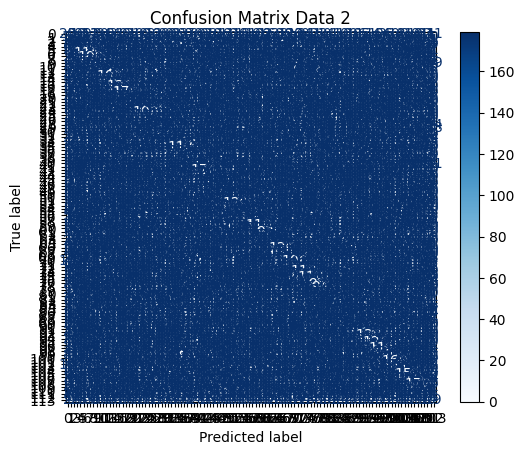

In [ ]:
cm2 = confusion_matrix(y_test_encoded2, y_pred2)
plt.figure(figsize=(100, 80))
ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=np.unique(y_test_encoded2)).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix Data 2')
plt.show()
#print("Confusion Matrix:")
#print(conf_matrix)

In [ ]:
print("Classification Report for Data 2:")
print(classification_report(y_test2, y_pred2))

Classification Report for Data 2:
              precision    recall  f1-score   support

           0       0.18      0.12      0.14       214
           1       0.39      0.18      0.25       202
           2       0.11      0.21      0.15       206
           3       0.13      0.03      0.05       201
           4       0.37      0.28      0.32       192
           5       0.16      0.17      0.16       199
           6       0.43      0.59      0.50       195
           7       0.32      0.61      0.42       178
           8       0.26      0.10      0.15       229
           9       0.16      0.14      0.15       206
          10       0.46      0.31      0.37       200
          11       0.03      0.01      0.02       187
          12       0.22      0.19      0.21       222
          13       0.45      0.51      0.48       203
          14       0.42      0.39      0.41       201
          15       0.29      0.28      0.28       208
          16       0.48      0.65      0.56    

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3da032f1-e5ab-4726-ac09-eb3d9c053730' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>